# Roche potential

\begin{equation}
 \Phi_{\rm Roche}(x,y,z) = - \dfrac{G M_1}{\sqrt{(x-x_1)^2+y^2+z^2}} - \dfrac{G M_2}{\sqrt{(x-x_2)^2+y^2+z^2}} - \dfrac{1}{2} \omega^2 (x^2+y^2)^2
\end{equation}

where the angular velocity is $\omega=\sqrt{\dfrac{G (M_1 + M_2)}{a^3}}$

In [56]:
%load_ext autoreload
%autoreload 2

import roche
from utils import Constants
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

c = Constants()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
m1 = 10
m2 = 5
a = 10
N = 1000
R = roche.Roche(m1, m2, a=10, N=100)

In [58]:
xL1, VL1 = R.L1()

In [59]:
xL2, VL2 = R.L2()

In [60]:
xL3, VL3 = R.L3()

In [61]:
x = np.linspace(-3*R.a, 3*R.a, N)
y = np.linspace(-3*R.a, 3*R.a, N)
X, Y = np.meshgrid(x, y)
V = R.V(X, Y)
# xL1 = R.L1() / c.Rsun
# VL1 = R.Vf(xL1)

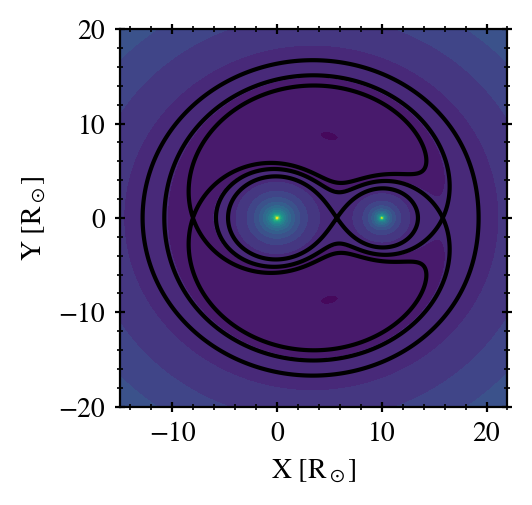

In [62]:
plt.style.use('../../style.mpl')
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.set_xlim([-15,22])
ax.set_ylim([-20,20])
ax.set_xlabel('X [R$_\\odot$]')
ax.set_ylabel('Y [R$_\\odot$]')

ax.contourf(X/c.Rsun, Y/c.Rsun, np.log10(-V), 20)

# L1
ax.contour(X/c.Rsun, Y/c.Rsun, -V, [-VL1], colors='black')

# L2
ax.contour(X/c.Rsun, Y/c.Rsun, -V, [-VL2], colors='black')

# L3
ax.contour(X/c.Rsun, Y/c.Rsun, -V, [-VL3], colors='black')

In [2]:
import lobes
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mu = 0.1
eq = lobes.Equipotentials(mu, 1024)

In [12]:
np.shape(eq.V)

(1024, 1024)

0.1 1.4550002773516015 455.3618518143234


Text(0, 0.5, '$y/(a + b)$')

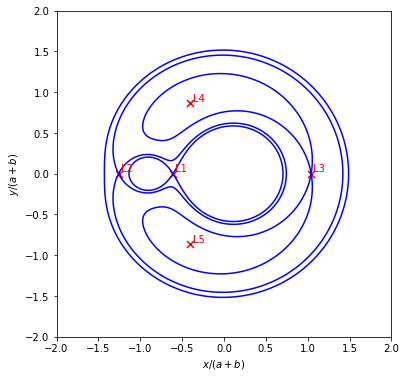

In [21]:
print(mu,  eq.V.min(), eq.V.max())

fig, ax = plt.subplots(figsize=(6,6))

# plt.imshow(np.log10(eq.V), origin="lower", cmap="Accent",
#                extent=[eq.xmin, eq.xmax, eq.ymin, eq.ymax])

# draw contours -- these values seem reasonable for a range of mu's
Vmin = 1.5 
Vmax = 1000.0  # np.max(V)
nC = 25
    
C = np.logspace(np.log10(Vmin), np.log10(Vmax), nC)

# plt.contour(eq.x, eq.y, eq.V, C, colors="b")

x_L1, y_L1, V_L1 = eq.get_L1()
x_L2, y_L2, V_L2 = eq.get_L2()
x_L3, y_L3, V_L3 = eq.get_L3()

# special contours right through the lagrange points
plt.contour(eq.x, eq.y, eq.V, [V_L1], colors="b")
plt.contour(eq.x, eq.y, eq.V, [V_L2], colors="b")
plt.contour(eq.x, eq.y, eq.V, [V_L3], colors="b")
    
# mark the Lagrange points and write the names
xeps = 0.025

plt.scatter([x_L1], [y_L1], marker="x", color="r", s=50)
plt.text(x_L1+xeps, y_L1+xeps, "L1", color="r")

plt.scatter([x_L2], [y_L2], marker="x", color="r", s=50)
plt.text(x_L2+xeps, y_L2+xeps, "L2", color="r")

plt.scatter([x_L3], [y_L3], marker="x", color="r", s=50)
plt.text(x_L3+xeps, y_L3+xeps, "L3", color="r")

x_L4, y_L4 = eq.get_L4()
plt.scatter([x_L4], [y_L4], marker="x", color="r", s=50)
plt.text(x_L4+xeps, y_L4+xeps, "L4", color="r")

x_L5, y_L5 = eq.get_L5()
plt.scatter([x_L5], [y_L5], marker="x", color="r", s=50)
plt.text(x_L5+xeps, y_L5+xeps, "L5", color="r")

plt.axis([eq.xmin, eq.xmax, eq.ymin, eq.ymax])

plt.xlabel("$x/(a + b)$")
plt.ylabel("$y/(a + b)$")

In [2]:
%load_ext autoreload
%autoreload 2

import tmp_roche as r
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
x, y = np.linspace(-1.5, 2, 300), np.linspace(-1.6, 1.6, 300)
xx, yy = np.meshgrid(x, y)
# Coordinates in orbital plain
z = 0

# Mass ratio
q = 0.2

# Get dimensional values of Roche potential
p = r.rochepot_dl(xx, yy, z, q)

In [4]:
# Positions (and potentials) of Lagrange points
l1, l1pot = r.get_lagrange_1(q)
l2, l2pot = r.get_lagrange_2(q)
l3, l3pot = r.get_lagrange_3(q)
l4, l5 = r.get_lagrange_4(), r.get_lagrange_5()
l4pot = r.rochepot_dl(l4[0], l4[1], l4[2], q)
l5pot = r.rochepot_dl(l5[0], l5[1], l5[2], q)

Effective (dimensionless) radii of first and second mass
According to the approximation of Eggleton 1983:
    Reff1: 0.521
    Reff2: 0.252

Roche volume and effective radius from Monte Carlo integration:
    MC Roche lobe volume 1: 0.7785 +/- 0.0034
    MC Roche lobe volume 2: 0.1225 +/- 0.0005
    MC effective radius 1: 0.5707 +/- 0.0008
    MC effective radius 2: 0.3081 +/- 0.0004


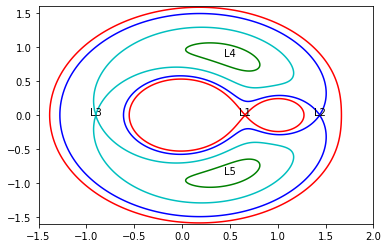

In [10]:
print("Effective (dimensionless) radii of first and second mass")
print("According to the approximation of Eggleton 1983:")
r1eff = r.roche_lobe_radius_eggleton(q, 1)
r2eff = r.roche_lobe_radius_eggleton(q, 2)
print("    Reff1: %5.3f" % r1eff)
print("    Reff2: %5.3f" % r2eff)
print()
print("Roche volume and effective radius from Monte Carlo integration:")
mcvol1 = r.roche_vol_MC(q, 1, pl=l2pot)
mcvol2 = r.roche_vol_MC(q, 2, pl=l2pot)
print("    MC Roche lobe volume 1: %6.4f +/- %6.4f" % (mcvol1[0:2]))
print("    MC Roche lobe volume 2: %6.4f +/- %6.4f" % (mcvol2[0:2]))
print("    MC effective radius 1: %6.4f +/- %6.4f" % (mcvol1[2:]))
print("    MC effective radius 2: %6.4f +/- %6.4f" % (mcvol2[2:]))

plt.contour(p, [l5pot*1.02, l3pot, l2pot, l1pot], colors=['g', 'c', 'b', 'r'], extent=[-1.5, 2, -1.6, 1.6])
plt.text(l1, 0, 'L1', horizontalalignment='center')
plt.text(l2, 0, 'L2', horizontalalignment='center')
plt.text(l3, 0, 'L3', horizontalalignment='center')
plt.text(l4[0], l4[1], 'L4', horizontalalignment='center')
plt.text(l5[0], l5[1], 'L5', horizontalalignment='center')
plt.show()